In [147]:
import tensorflow as tf
import numpy as np
import pickle as pk
from keras.applications.resnet50 import ResNet50
from avg_pooling import *
import imageio
import pickle
import numpy as np
import os, subprocess
from matplotlib import pyplot as plt
#import av
import cv2
# imageio.plugins.ffmpeg.download()
import gc 


## UCF 11

In [154]:
input_dir=['C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\basketball\\v_shooting_23\\v_shooting_23_01.avi','C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\volleyball_spiking\\v_spiking_23\\v_spiking_23_04.avi','C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\biking\\v_biking_22\\v_biking_22_02.avi',
           'C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\horse_riding\\v_riding_21\\v_riding_21_01.avi', 'C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\soccer_juggling\\v_juggle_22\\v_juggle_22_04.avi', 'C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\trampoline_jumping\\v_jumping_24\\v_jumping_24_03.avi', 'C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\golf_swing\\v_golf_23\\v_golf_23_03.avi','C:\\Users\\hp\Documents\\video_class\\action_youtube_naudio\\golf_swing\\v_golf_24\\v_golf_24_03.avi']

In [149]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3), pooling='max')

In [150]:
def crop(length, crop_num):
    if length<=crop_num:
        return None
    else:
        k=int((length-crop_num)/2)
        return (k, crop_num+k)


def get_frames(input_loc, crop_num):
    cap = cv2.VideoCapture(input_loc)
    ret=True
    result=[]
    shape=(224,224,3)
    miss=False
    print ('Converting video ....')
    while(ret):
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Our operations on the frame come here
        #gray = cv2.cvtColor(frame)
        
        # Display the resulting frame
        #cv2.imshow('frame',gray)
        if ret==False:
            break
        
        if (frame.shape[0]<shape[0])&(frame.shape[1]<shape[1]):
            miss=True
            break
        result.append(frame)
    # When everything done, release the capture
    cap.release()
    if miss:
        return None, miss
    p=[]
    print (len(result))
    #for i in range (0,50,5):
    #    p.append(result[i])
    k=crop(len(result),crop_num)
    if k==None:
        return None, True
    result=result[k[0]:k[1]]
    res=[]
    for x in range(0,crop_num, int(crop_num/10)):
        res.append(result[x][:224,:224,:])
    collect=gc.collect()
    return np.array(res), miss


In [155]:
examples=[]
vectors=[]
for direc in input_dir:
    print (direc)
    ex=get_frames(direc, 40)
    vec=extract_features(ex[0], model)
    examples.append(ex)
    vectors.append(vec)

C:\Users\hp\Documents\video_class\action_youtube_naudio\basketball\v_shooting_23\v_shooting_23_01.avi
Converting video ....
101
C:\Users\hp\Documents\video_class\action_youtube_naudio\volleyball_spiking\v_spiking_23\v_spiking_23_04.avi
Converting video ....
132
C:\Users\hp\Documents\video_class\action_youtube_naudio\biking\v_biking_22\v_biking_22_02.avi
Converting video ....
141
C:\Users\hp\Documents\video_class\action_youtube_naudio\horse_riding\v_riding_21\v_riding_21_01.avi
Converting video ....
171
C:\Users\hp\Documents\video_class\action_youtube_naudio\soccer_juggling\v_juggle_22\v_juggle_22_04.avi
Converting video ....
201
C:\Users\hp\Documents\video_class\action_youtube_naudio\trampoline_jumping\v_jumping_24\v_jumping_24_03.avi
Converting video ....
131
C:\Users\hp\Documents\video_class\action_youtube_naudio\golf_swing\v_golf_23\v_golf_23_03.avi
Converting video ....
149
C:\Users\hp\Documents\video_class\action_youtube_naudio\golf_swing\v_golf_24\v_golf_24_03.avi
Converting vide

In [156]:
vect=np.array(vectors)
pickle.dump(vect, open('example11.p', 'wb'), protocol=2)

In [238]:
beta=pickle.load(open('beta_example11_.p', 'rb'))[0]

In [239]:
beta=beta.reshape(8,10)

## examples

### example max

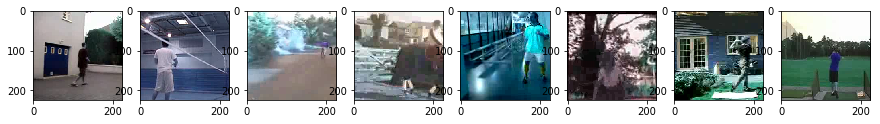

In [211]:
fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x[0][np.argmax(beta[i])])
plt.show()

## example min

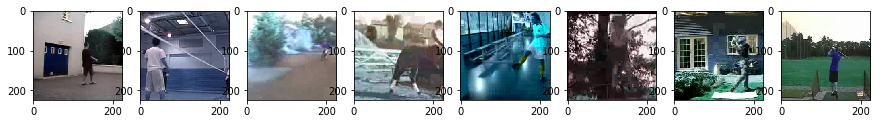

In [212]:
fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x[0][np.argmin(beta[i])])
plt.show()

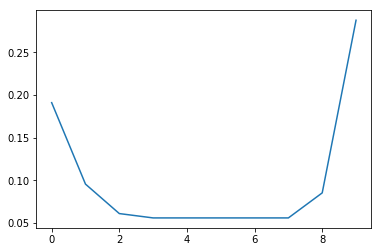

In [245]:
plt.plot(beta[6])

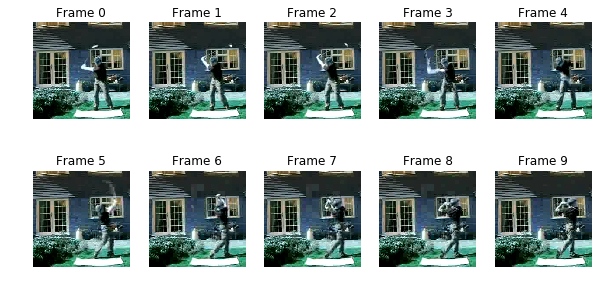

In [247]:
fig=plt.figure(figsize=(10, 5))
for i, x in enumerate(examples[6][0]):
    fig.add_subplot(2,5,i+1, axisbelow=False)
    plt.imshow(x)
    plt.gca().set_title('Frame '+str(i))
    plt.axis('off')

plt.savefig('golf.png')    
plt.show()

In [217]:
beta[1]

array([0.1770917 , 0.09127879, 0.05935251, 0.05372356, 0.05273063,
       0.06220335, 0.05862401, 0.04739886, 0.09121986, 0.30637664],
      dtype=float32)

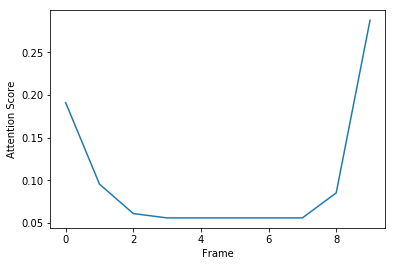

In [246]:
plt.plot(beta[6])
plt.xlabel('Frame')
plt.ylabel('Attention Score')
plt.savefig('golf_beta.png')

## rescaling : getting rid of last and first plot

In [105]:
def softmax(x):
    k=np.exp(x)
    return k/k.sum() 


In [110]:
beta_new=[softmax(x[1:9]) for x in beta]

In [111]:
beta_new=np.array(beta_new)

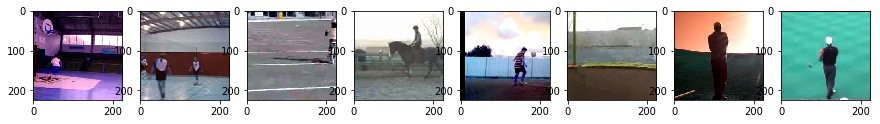

In [112]:
##maximum

fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x[0][1:9][np.argmax(beta_new[i])])
plt.show()

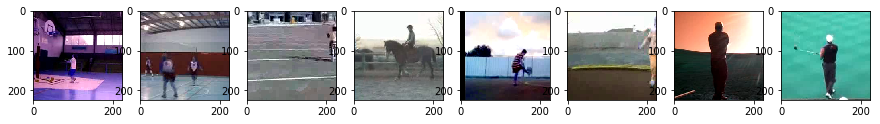

In [113]:
##maximum

fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x[0][1:9][np.argmin(beta_new[i])])
plt.show()

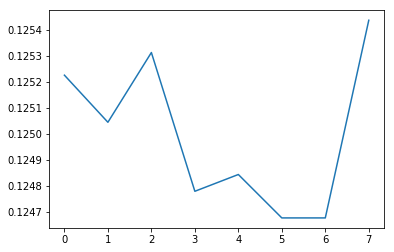

In [118]:
plt.plot(softmax(beta_new[1]))

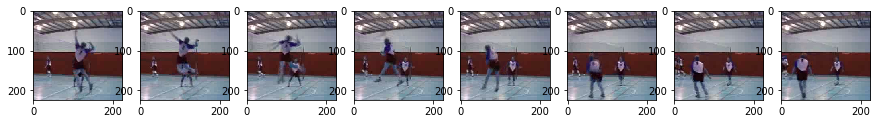

In [119]:
fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples[1][0][1:9]):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x)
plt.show()

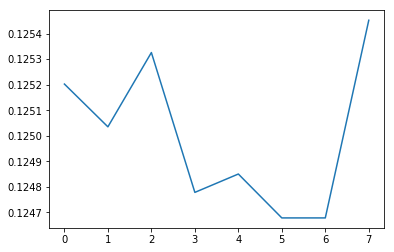

In [121]:
plt.plot(softmax(beta_new[0]))

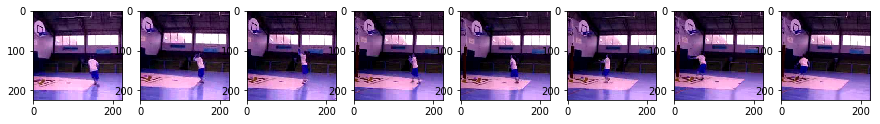

In [122]:
fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples[0][0][1:9]):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x)
plt.show()

In [137]:
accuracy=pickle.load(open('list_acc_11.p', 'rb'))

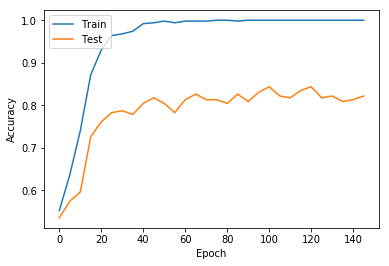

In [146]:
plt.plot([x*5 for x in range(len(accuracy[0]))],accuracy[0])
plt.plot( [x*5 for x in range(len(accuracy[0]))],accuracy[1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy11.png')
plt.show()

## UCF - 50

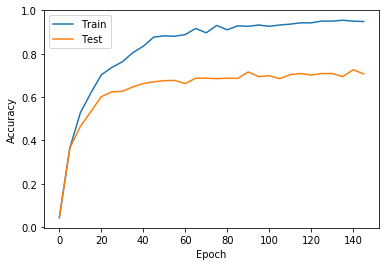

In [166]:
accuracy=pickle.load(open('list_acc_50.p', 'rb'))

plt.plot([x*5 for x in range(len(accuracy[0]))],accuracy[0])
plt.plot( [x*5 for x in range(len(accuracy[0]))],accuracy[1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy50.png')
plt.show()

In [233]:
beta=pickle.load(open('beta_example11_.p', 'rb'))

In [237]:
beta[1][0]

array([9.9978143e-01, 8.0626478e-13, 1.8676642e-10, 1.7209095e-08,
       4.2943326e-17, 3.2696811e-05, 1.0662215e-13, 1.7291978e-04,
       3.4047415e-15, 1.3035149e-05, 1.3757390e-12], dtype=float32)

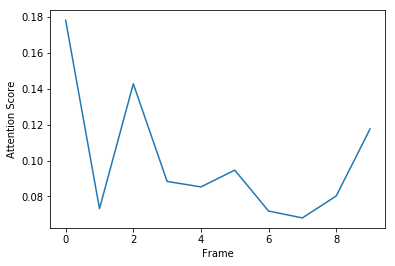

In [198]:
plt.plot(beta[0])
plt.xlabel('Frame')
plt.ylabel('Attention Score')
plt.savefig('basket_beta.png')

In [178]:
examples[0][0].shape

(10, 224, 224, 3)

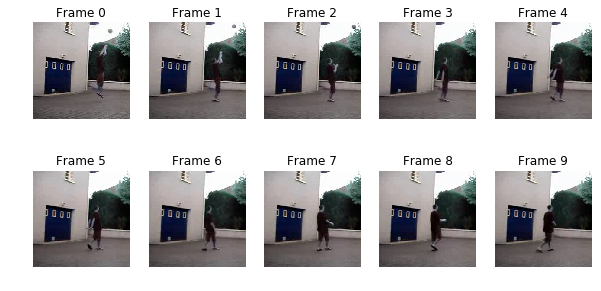

In [229]:
fig=plt.figure(figsize=(10, 5))
for i, x in enumerate(examples[0][0]):
    fig.add_subplot(2,5,i+1, axisbelow=False)
    plt.imshow(x)
    plt.gca().set_title('Frame '+str(i))
    plt.axis('off')

#plt.savefig('basket.png')    
plt.show()

Text(0,0.5,'Attention Score')

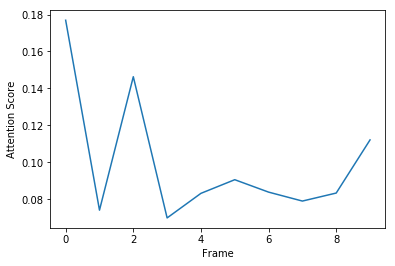

In [205]:
plt.plot(beta[5])
plt.xlabel('Frame')
plt.ylabel('Attention Score')
plt.savefig('soccer_beta.png')

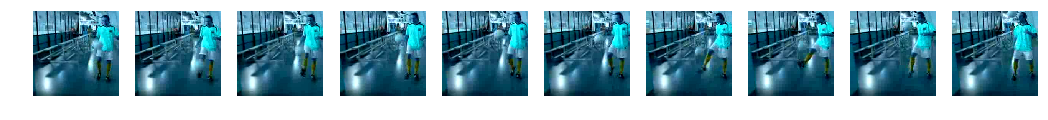

In [208]:
fig=plt.figure(figsize=(18, 18))
for i, x in enumerate(examples[4][0]):
    fig.add_subplot(1,10,i+1, axisbelow=False)
    plt.imshow(x)
    plt.axis('off')

plt.savefig('soccer.png')    
plt.show()

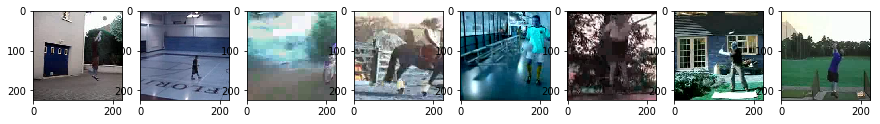

In [171]:
##maximum

fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x[0][np.argmax(beta[i])])
plt.show()

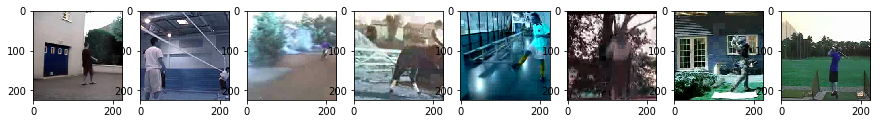

In [172]:

fig=plt.figure(figsize=(15, 15))
for i, x in enumerate(examples):
    fig.add_subplot(1,8,i+1)
    plt.imshow(x[0][np.argmin(beta[i])])
plt.show()